In [37]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import glob


In [38]:
learning_rate = 0.001
batch_size = 10
epochs = 10

device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device == 'cuda':
    torch.cuda.manual_seed_all(1234)


print(device)

cpu


In [39]:
def create_dataset():
    df1 = pd.read_csv("rose.csv", sep=',',
                      header=None, encoding='UTF-16')
                      
    df2 = pd.read_csv("tulip.csv", sep=',',
                      header=None, encoding='UTF-16')
    df = pd.concat([df1, df2], ignore_index=True)
    df.drop(1, axis=1, inplace=True)
    df.rename(columns={0: 'AbsolutePath', 2: 'DatasetClass'}, inplace=True)
    return df

df = create_dataset() 
print(df)

                           AbsolutePath DatasetClass
0      D:\rtfiles\dataset\rose\0001.jpg         rose
1      D:\rtfiles\dataset\rose\0002.jpg         rose
2      D:\rtfiles\dataset\rose\0003.jpg         rose
3      D:\rtfiles\dataset\rose\0004.jpg         rose
4      D:\rtfiles\dataset\rose\0005.jpg         rose
...                                 ...          ...
2035  D:\rtfiles\dataset\tulip\1016.jpg        tulip
2036  D:\rtfiles\dataset\tulip\1017.jpg        tulip
2037  D:\rtfiles\dataset\tulip\1018.jpg        tulip
2038  D:\rtfiles\dataset\tulip\1019.jpg        tulip
2039  D:\rtfiles\dataset\tulip\1020.jpg        tulip

[2040 rows x 2 columns]


In [40]:

path_test= os.path.join("D:", "pylab5", "test_set")
path_train = os.path.join("D:", "pylab5", "train_set")
path_val = os.path.join("D:", "pylab5", "validation_set")

def load_set(df: pd.DataFrame, path: str, number: int):
        image_path = df["AbsolutePath"][number]
        image = cv2.imread(image_path)
        new_path = os.path.join(path, f'{df.DatasetClass[number]}_{number}.jpg')
        cv2.imwrite(new_path, image)


for i in range(816):
    load_set(df, path_train, i)
for i in range(816, 918):
    load_set(df, path_test, i)
for i in range(918, 1020):
    load_set(df, path_val, i)
for i in range(1020, 1836):
    load_set(df, path_train, i)
for i in range(1836, 1938):
    load_set(df, path_test, i)
for i in range(1938, 2040):
    load_set(df, path_val, i)


KeyboardInterrupt: 

In [46]:
train_list = glob.glob(os.path.join(path_train, '*.jpg'))
test_list = glob.glob(os.path.join(path_test, '*.jpg'))

train_list, val_list = train_test_split(train_list, test_size=0.1)

[697 283 452  65 516 123 324 748 599 110]


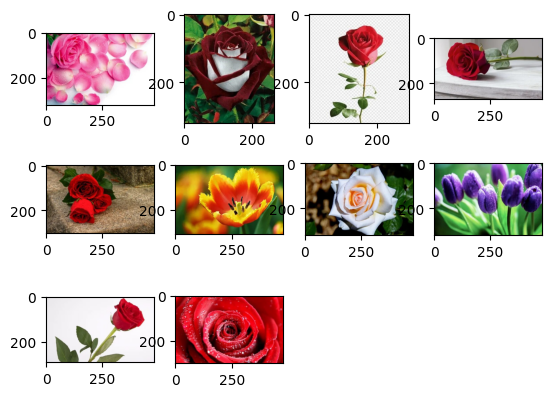

In [53]:
index = np.random.randint(1, 800, size=10)
print(index)
fig = plt.figure()
i = 1
for idx in index:
    ax = fig.add_subplot(3, 4, i)
    img = cv2.imread(train_list[idx])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    i += 1
plt.show()

In [55]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
            
        self.fc1 = nn.Linear(576, 10)
        self.dropout = nn.Dropout(0.1)
        self.fc2 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x: torch.tensor) -> torch.tensor:
        output = self.layer1(x)
        output = self.layer2(output)
        output = self.layer3(output)
        out = out.view(out.size(0),-1)
        output = self.relu(self.fc1(output))
        output = self.fc2(output)   
        return torch.nn.Sigmoid()(output)

model = CNN().to(device)
model.train()
optimizer = optim.Adam(params = model.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss()